In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import torchvision as tv
import cv2

In [ ]:
## Read image from .jpg file. Make sure the image is in the same directory as notebook
img = cv2.imread('Top-feature-image-scaled.jpg')
print(type(img))  # img is a 3-dimensional numpy array
print(img.shape)

<class 'numpy.ndarray'>
(2560, 2328, 3)


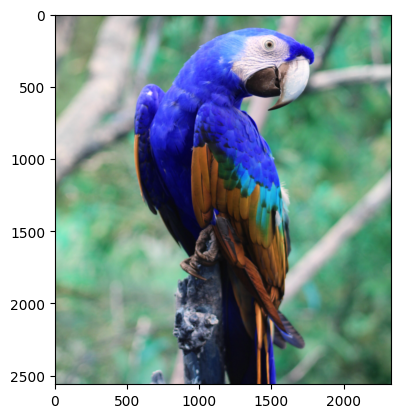

In [ ]:
plt.figure()
plt.imshow(img)

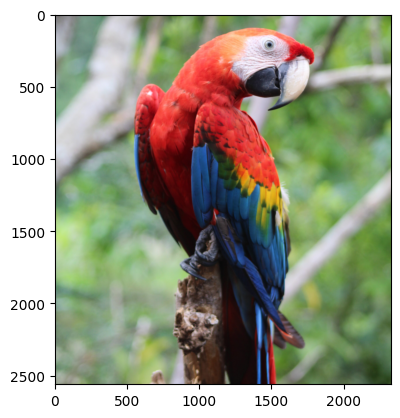

In [ ]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #converts color space from BGR to RGB
plt.figure()
plt.imshow(img_rgb)

Text(0.5, 1.0, 'B')

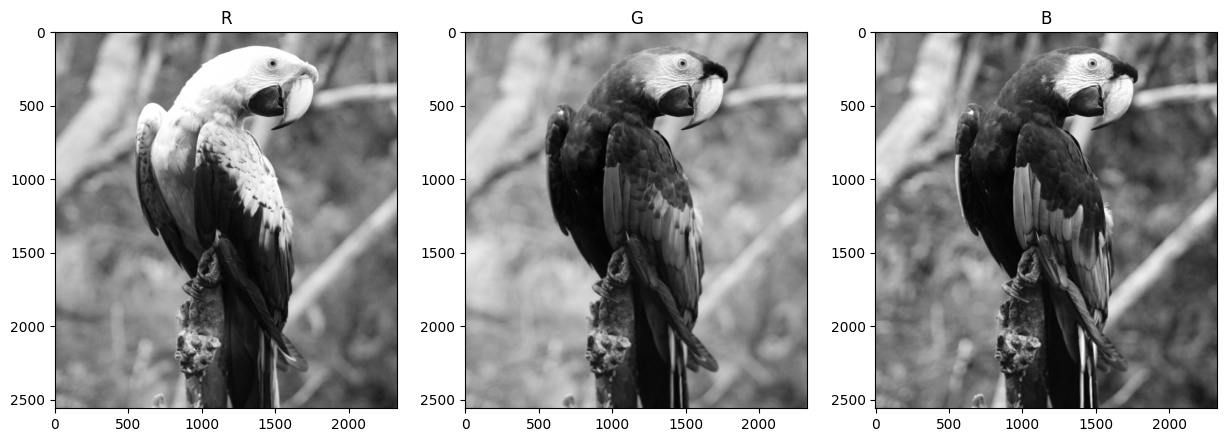

In [ ]:
# Part a) display each channel of image separately

# Use parrot image
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_red = img_rgb[:,:,0]
img_green = img_rgb[:,:,1]
img_blue = img_rgb[:,:,2]
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(img_red, cmap = 'gray')     # 'gray' is to show a single-channel image in grayscale
plt.title('R')
plt.subplot(1,3,2)
plt.imshow(img_green, cmap = 'gray')
plt.title('G')
plt.subplot(1,3,3)
plt.imshow(img_blue, cmap = 'gray')
plt.title('B')

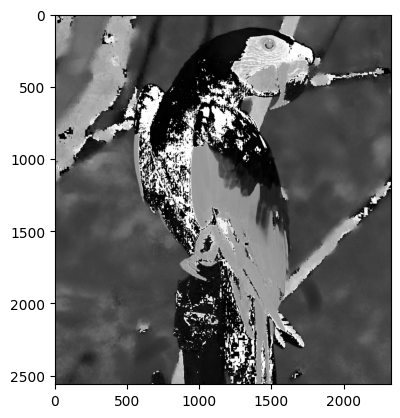

In [ ]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)    # Change to HSV
img_hue = img_hsv[:,:,0]   # The first channel  hue is hue component. Or the grayscale of a color image
plt.figure()
plt.imshow(img_hue, 'gray')

Text(0.5, 1.0, 'V')

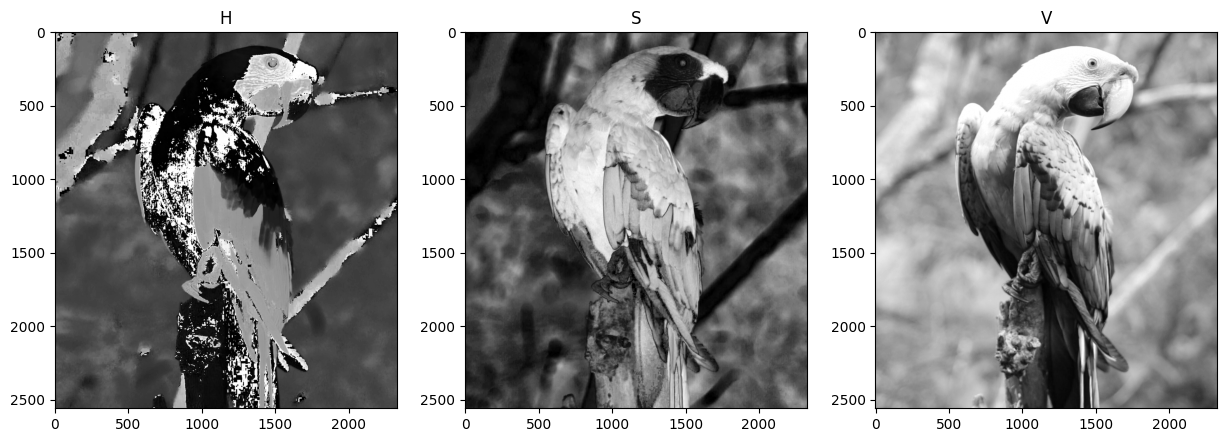

In [ ]:
# Part b) display each HSV channel of image separately

# Use parrot image
img_h = img_hsv[:,:,0]
img_s = img_hsv[:,:,1]
img_v = img_hsv[:,:,2]
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(img_h, cmap = 'gray')     # 'gray' is to show a single-channel image in grayscale
plt.title('H')
plt.subplot(1,3,2)
plt.imshow(img_s, cmap = 'gray')
plt.title('S')
plt.subplot(1,3,3)
plt.imshow(img_v, cmap = 'gray')
plt.title('V')

In [ ]:
img_blue = np.where(img_h)

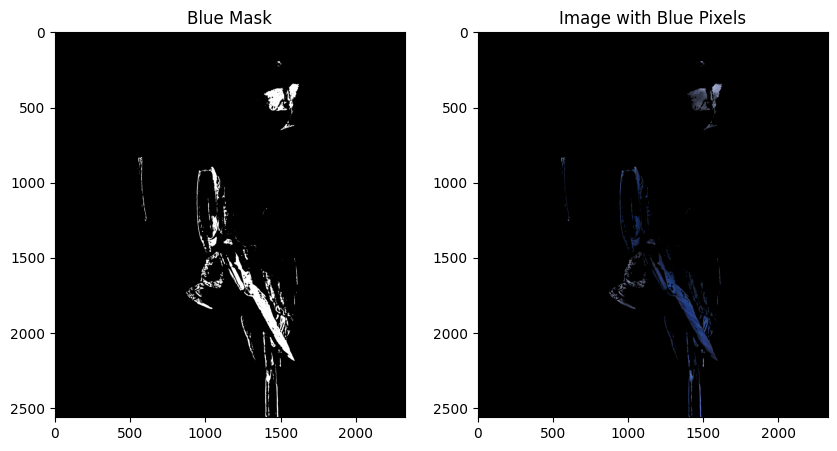

In [ ]:

# Define the blue hue range in HSV [110, 130] (Note: You need ranges for the entire HSV values)
lower_blue = np.array([110, 50, 50])  # Lower bound for hue, sat, val (adjust saturation and value if needed)
upper_blue = np.array([130, 255, 255])  # Upper bound for hue, sat, val

# Create a binary mask for the blue color
mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)

# Apply the mask to the original image
blue_pixels = cv2.bitwise_and(img, img, mask=mask_blue)

# Display the mask and the result
plt.figure(figsize=(10, 5))

# Show the binary mask
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue Mask')

# Show the result (image with only blue pixels)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blue_pixels, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Image with Blue Pixels')

plt.show()


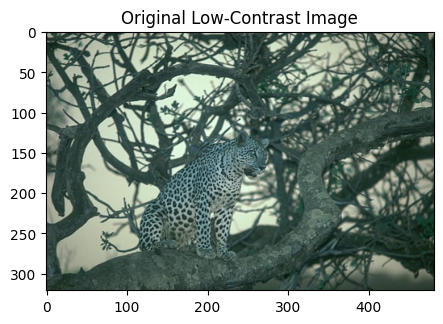

In [42]:
# 2ND PART
# (a) Load a low-contrast grayscale image
# Replace 'low_contrast_image.png' with the path to your image
img = cv2.imread('low_contrast_image.png')

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Original Low-Contrast Image')
plt.show()



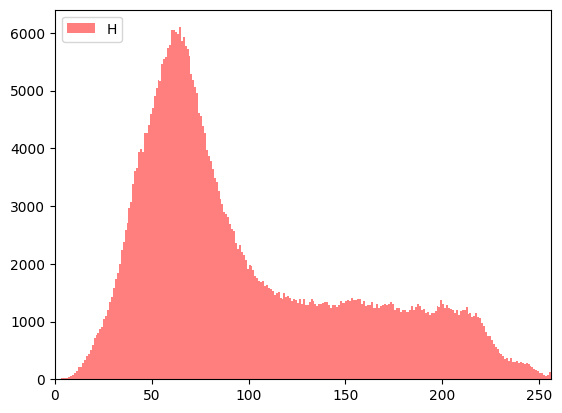

In [26]:
# (b) Calculate and plot the histogram of the image
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Plot histogram and C.D.F.
plt.hist(img.flatten(), 256, [0, 256], color="r", alpha=0.5)
plt.xlim([0, 256])
plt.legend(("Histogram"), loc="upper left")
plt.show()

# Comment: In a low-contrast image, the histogram will be clustered around a narrow range,
# meaning there aren't many high or low intensity values, which reflects the poor contrast.



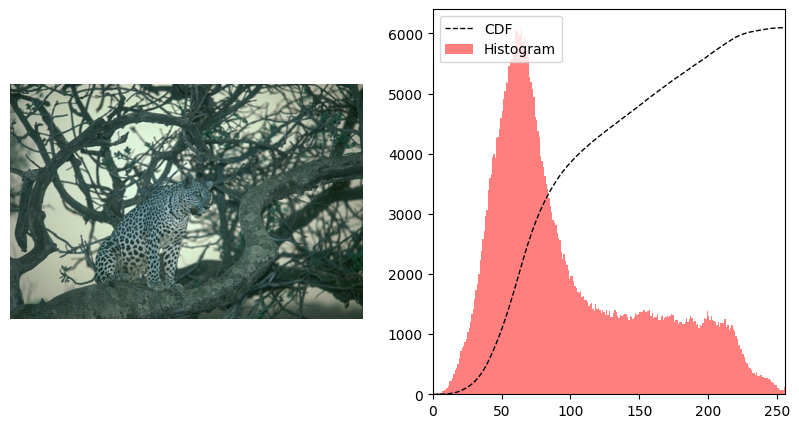

In [28]:
# (c) Calculate the Cumulative Distribution Function (CDF) of the histogram
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize for plotting

# Plot histogram and C.D.F.
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Show the image in grayscale
axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axs[0].axis("off")

# Plot the histogram and the CDF
axs[1].plot(cdf_normalized, color="black", linestyle="--", linewidth=1)
axs[1].hist(img.flatten(), 256, [0, 256], color="r", alpha=0.5)
axs[1].set_xlim([0, 256])
axs[1].legend(("CDF", "Histogram"), loc="upper left")
plt.show()
# Comment: The CDF provides the optimal transformation for histogram equalization.
# If the CDF is too flat, it may not be the best for equalization, but in this case, it usually works well.

In [29]:
# (d) Apply the CDF as a transformation function (Histogram Equalization)
# Convert image to HSV space

hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_img)


In [30]:
# Equalize the V (Value) channel
v_equalized = cv2.equalizeHist(v)

# Merge the HSV channels back, with the equalized V channel
hsv_img = cv2.merge([h, s, v_equalized])

# Convert back to RGB color space
img_equalized = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'Equalized Image')

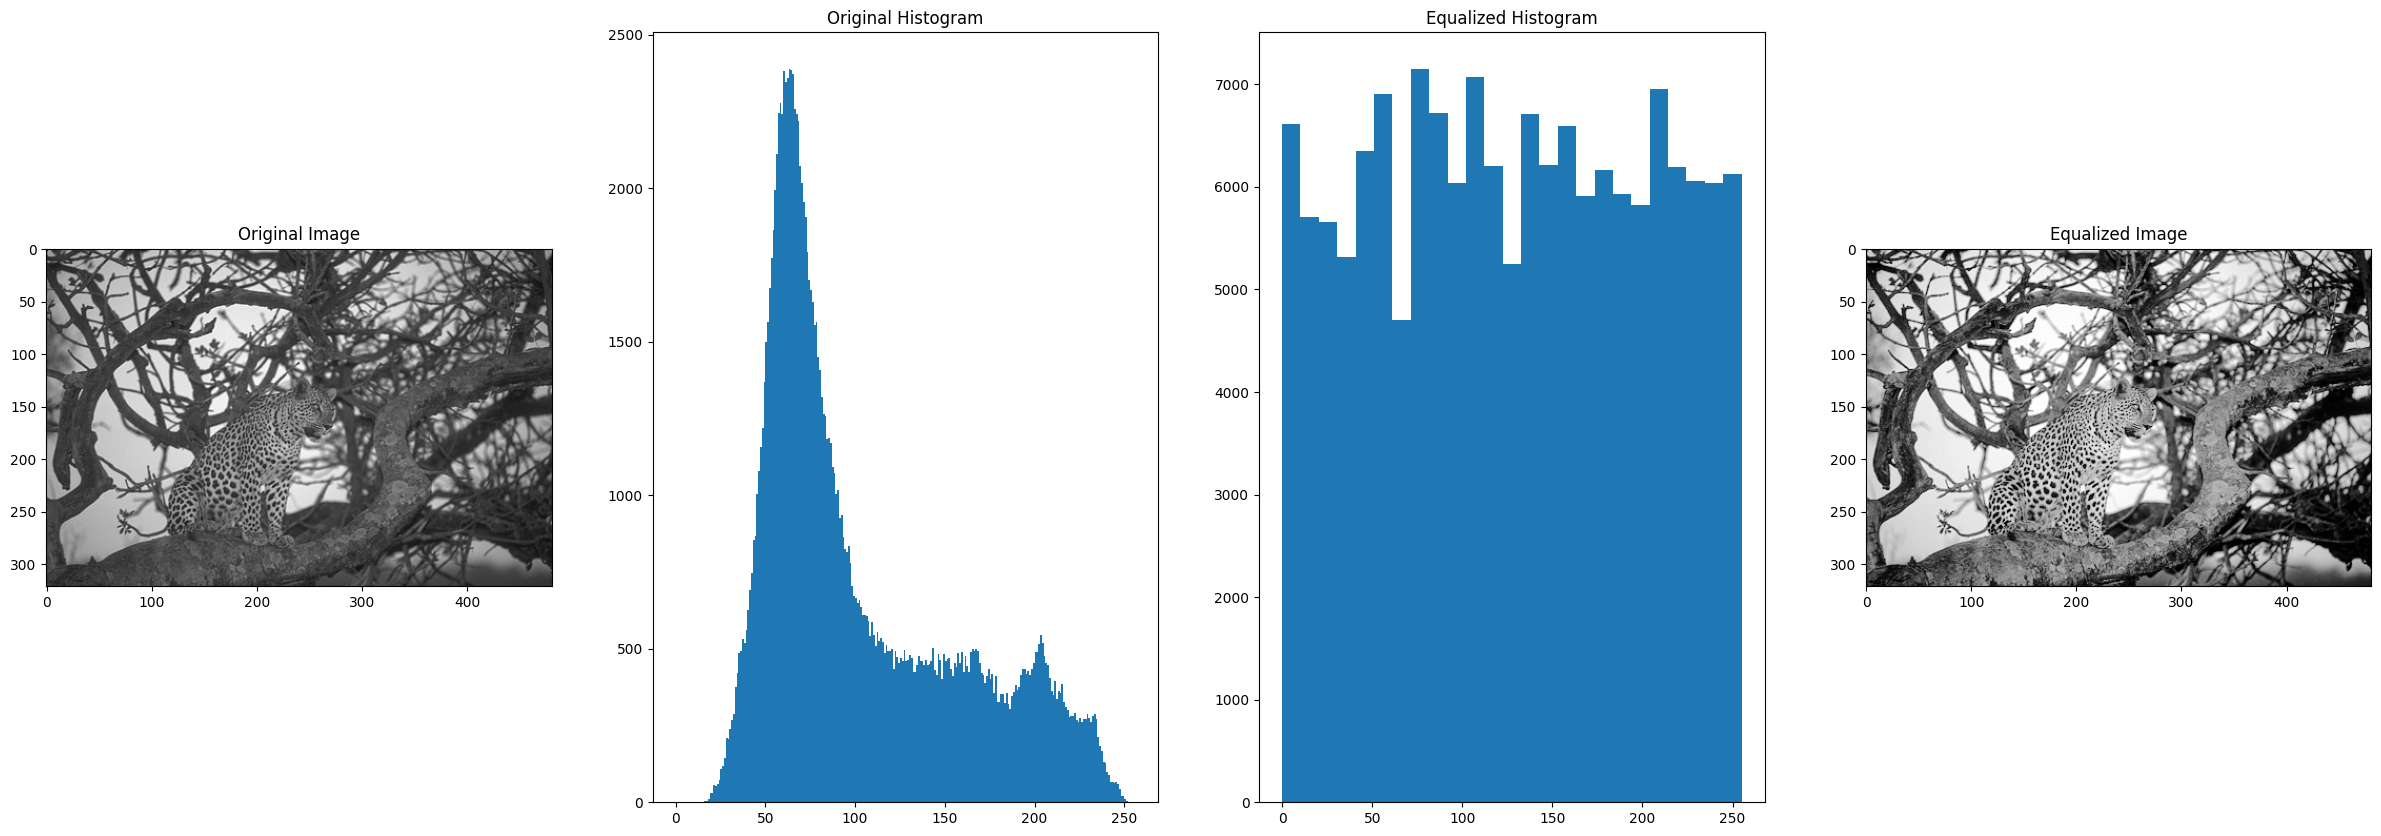

In [41]:
# Create a figure with subplots to compare the images
plt.figure(figsize=(30, 10))
# Show equalized image
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
# Compare original and equalized histograms
plt.subplot(1, 4, 2)
plt.hist(img.flatten(), 256, [0, 256])
plt.title('Original Histogram')
plt.subplot(1, 4, 3)
plt.hist(img_equalized.flatten(), 25)
plt.title('Equalized Histogram')
plt.subplot(1, 4, 4)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')